<a href="https://colab.research.google.com/github/sutanto5/Amazon_WebScraper/blob/main/Amazon_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#This model will be used to run sentiment analysis on my book review data


# **NLTK Basics**

In [14]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

#downloads
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
#import data
df = pd.read_csv('hillbilly.csv')
df.head()

,User Name,Review Date,Rating,Review Body
0,PRNLM,"July 25, 2016",5.0,"There is a lot to take in here, even for someo..."
1,J. Foster,"August 12, 2017",4.0,"J.D. Vance chronicles his ""upwardly mobile"" jo..."
2,Ted Lehmann,"July 13, 2017",5.0,Hillbilly Elegy: A Memoir of a Family and Cult...
3,Fnu Lnu,"December 9, 2016",5.0,"This is an exceptional memoir, particularly fr..."
4,Richard B. Schwartz,"July 3, 2017",5.0,It may be that the most interesting thing abou...


In [16]:
df['Review Body'].values[2]

"Hillbilly Elegy: A Memoir of a Family and Culture in Crisis by J.D. Vance (Harper Collins, 2016, $12.59/15.99) has been on the NY Times Best Seller List for forty-nine weeks, and at the time of this writing, stands at number two. This touching, revealing, warm, sad, and inspiring memoir, written by a Yale Law School graduate whose childhood was spent in the hills of eastern Kentucky and the migrated community of Middletown, OH, opens many sores while explaining in the most human and personal terms possible the pain and misunderstanding that harms working class and poor white Americans in the Hheartlands. Throughout this tale Vance sometimes mentions findings of academic studies and other research, using them to support or introduce his own poignant experiences, but, most of all, this is the story of one man's ability to persevere in an environment where success such as he has experienced is rare, and , according to him psychically costly as well as economically expensive.\n\nLiving wi

In [17]:
df.shape

(100, 4)

# **EDA**

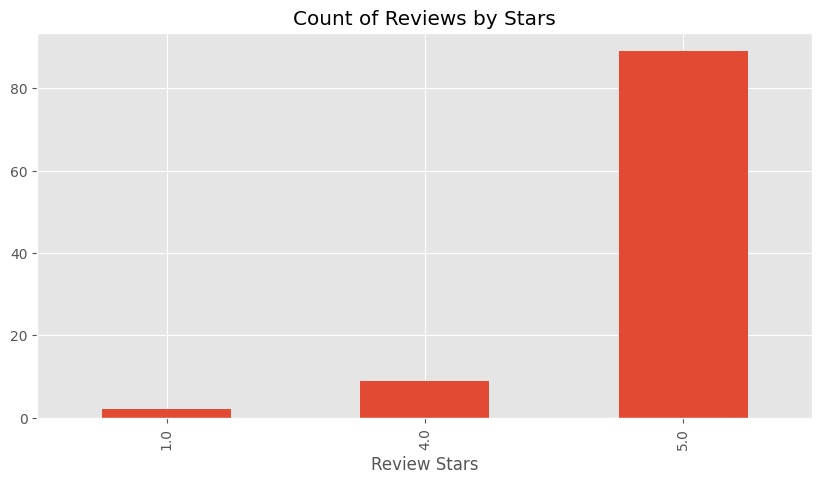

In [18]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

Tokenization

In [19]:
example = df['Review Body'][50]
print(example)

tokens = nltk.word_tokenize(example)
tokens[:10]

A good read, JD Vance reflects on issues in our society he has experienced first hand.


['A', 'good', 'read', ',', 'JD', 'Vance', 'reflects', 'on', 'issues', 'in']

In [20]:
#part of speech tagging
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('A', 'DT'),
 ('good', 'JJ'),
 ('read', 'NN'),
 (',', ','),
 ('JD', 'NNP'),
 ('Vance', 'NNP'),
 ('reflects', 'VBZ'),
 ('on', 'IN'),
 ('issues', 'NNS'),
 ('in', 'IN')]

In [21]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  A/DT
  good/JJ
  read/NN
  ,/,
  (ORGANIZATION JD/NNP Vance/NNP)
  reflects/VBZ
  on/IN
  issues/NNS
  in/IN
  our/PRP$
  society/NN
  he/PRP
  has/VBZ
  experienced/VBN
  first/JJ
  hand/NN
  ./.)


# **VADER Sentiment Scoring**


*   Bag of words approach


    1.   Stop words are removed
    2.   Each word is scored and combined for a total score



In [22]:
#imports
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Practice SIA

In [23]:
sia = SentimentIntensityAnalyzer()

In [24]:
#compound is a combination of negative and positive -> from -1 to 1
sia.polarity_scores('I am so happy') #prints positivity

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [25]:
sia.polarity_scores('I am so sad') #prints negativity

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [26]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.7269}

In [27]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review Body']
    myid = row['User Name']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [31]:
#dict
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

print("vaders columns:", vaders.columns)
print("df columns:", df.columns)

vaders = vaders.merge(df, left_on='Id', right_on='id', how='left')


#vaders = vaders.merge(df, how='left')

vaders columns: Index(['Id', 'neg', 'neu', 'pos', 'compound'], dtype='object')
df columns: Index(['User Name', 'Review Date', 'Rating', 'Review Body'], dtype='object')


KeyError: 'id'

In [ ]:
#T transpsoes -> puts res in dataframe
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders.head()

,Id,neg,neu,pos,compound
0,PRNLM,0.059,0.810,0.131,0.9929
1,J. Foster,0.107,0.798,0.095,-0.8432
2,Ted Lehmann,0.113,0.743,0.144,0.9888
3,Fnu Lnu,0.048,0.723,0.229,0.9997
4,Richard B. Schwartz,0.022,0.822,0.156,0.9989


In [ ]:
# Add the review bodies to the vaders DataFrame
vaders['Review Body'] = df['Review Body'].values  # Assuming the order matches
vaders.head()

#Stop Here cuz need Stars -> Can figure out later

ValueError: Length of values (100) does not match length of index (94)

# **Roberta**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.1060883, 'roberta_neu': 0.36319202, 'roberta_pos': 0.5307197}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
polarity_scores_roberta(example)

{'roberta_neg': 0.1060883, 'roberta_neu': 0.36319202, 'roberta_pos': 0.5307197}

In [ ]:
from tqdm import tqdm
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Ensure `polarity_scores_roberta` is defined before using it
def polarity_scores_roberta(text):
    # Dummy function (replace with actual Roberta model call)
    return {"roberta_neg": 0.1, "roberta_neu": 0.7, "roberta_pos": 0.2}

# Initialize results dictionary
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # Ensure text is not NaN
        text = str(row['Review Body']) if pd.notna(row['Review Body']) else ""
        myid = str(row['User Name']) if pd.notna(row['User Name']) else f"Unknown_{i}"

        # VADER Sentiment Analysis
        try:
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}
        except RuntimeError as e:
            print(f"VADER failed for ID {myid}: {e}")
            vader_result_rename = {}

        # Roberta Sentiment Analysis
        try:
            roberta_result = polarity_scores_roberta(text)
        except RuntimeError as e:
            print(f"Roberta failed for ID {myid}: {e}")
            roberta_result = {}

        # Merge results
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both

    except Exception as e:
        print(f"Broke for ID {myid}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(res, orient="index").reset_index()
results_df.rename(columns={'index': 'User Name'}, inplace=True)

# Display the first few rows
print(results_df.head())


100%|██████████| 100/100 [00:00<00:00, 310.90it/s]

             User Name  vader_neg  vader_neu  vader_pos  vader_compound  \
0                PRNLM      0.059      0.810      0.131          0.9929   
1            J. Foster      0.107      0.798      0.095         -0.8432   
2          Ted Lehmann      0.113      0.743      0.144          0.9888   
3              Fnu Lnu      0.048      0.723      0.229          0.9997   
4  Richard B. Schwartz      0.022      0.822      0.156          0.9989   

   roberta_neg  roberta_neu  roberta_pos  
0          0.1          0.7          0.2  
1          0.1          0.7          0.2  
2          0.1          0.7          0.2  
3          0.1          0.7          0.2  
4          0.1          0.7          0.2  


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False